In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_death=pd.read_csv("death .csv")

In [3]:
data_death.head()

index                       County   FIPS Met Objective of 45.5? (1)  \
0      0                United States      0                         No   
1      1       Perry County, Kentucky  21193                         No   
2      2      Powell County, Kentucky  21197                         No   
3      3  North Slope Borough, Alaska   2185                         No   
4      4      Owsley County, Kentucky  21189                         No   

  Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
0                      46                                         45.9   
1                   125.6                                        108.9   
2                   125.3                                        100.2   
3                   124.9                                           73   
4                   118.5                                         83.1   

  Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
0                                         46.1                  157376   
1                                        144.2                      43   
2                                        155.1                      18   
3                                        194.7                       5   
4                                        165.5                       8   

  Recent Trend (2) Recent 5-Year Trend (2) in Death Rates  \
0          falling                                   -2.4   
1           stable                                   -0.6   
2           stable                                    1.7   
3               **                                     **   
4           stable                                    2.2   

  Lower 95% Confidence Interval for Trend  \
0                                    -2.6   
1                                    -2.7   
2                                       0   
3                                      **   
4                                    -0.4   

  Upper 95% Confidence Interval for Trend  
0                                    -2.2  
1                                     1.6  
2                                     3.4  
3                                      **  
4                                     4.8

In [4]:
data_death.describe()

index          FIPS
count  3141.000000   3141.000000
mean   1570.000000  30392.281757
std     906.872924  15158.200839
min       0.000000      0.000000
25%     785.000000  18179.000000
50%    1570.000000  29177.000000
75%    2355.000000  45081.000000
max    3140.000000  56045.000000

In [5]:
data_death.isnull().sum()

index                                           0
County                                          0
FIPS                                            0
Met Objective of 45.5? (1)                      0
Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
Average Deaths per Year                         0
Recent Trend (2)                                0
Recent 5-Year Trend (2) in Death Rates          0
Lower 95% Confidence Interval for Trend         0
Upper 95% Confidence Interval for Trend         0
dtype: int64

In [6]:
data_death.shape

(3141, 12)

In [7]:
data_death.dtypes

index                                            int64
County                                          object
FIPS                                             int64
Met Objective of 45.5? (1)                      object
Age-Adjusted Death Rate                         object
Lower 95% Confidence Interval for Death Rate    object
Upper 95% Confidence Interval for Death Rate    object
Average Deaths per Year                         object
Recent Trend (2)                                object
Recent 5-Year Trend (2) in Death Rates          object
Lower 95% Confidence Interval for Trend         object
Upper 95% Confidence Interval for Trend         object
dtype: object

In [8]:
data_death.columns

Index(['index', 'County', 'FIPS', 'Met Objective of 45.5? (1)',
       'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95% Confidence Interval for Trend'],
      dtype='object')

In [9]:
data_death['County']

0                                      United States
1                             Perry County, Kentucky
2                            Powell County, Kentucky
3                        North Slope Borough, Alaska
4                            Owsley County, Kentucky
                            ...                     
3136    Yakutat City and Borough, Alaska<sup>3</sup>
3137               Yukon-Koyukuk Census Area, Alaska
3138                            Zapata County, Texas
3139                            Zavala County, Texas
3140                    Ziebach County, South Dakota
Name: County, Length: 3141, dtype: object

In [10]:
#Separately finding out the states and creating a new column for it
def func(x):
    if x.find(',')!=-1:
        mylist=x.split(',')
        y=mylist[1]
        return y
    else:
        return x

In [11]:
state=data_death['County'].apply(lambda x: func(x))
state

0             United States
1                  Kentucky
2                  Kentucky
3                    Alaska
4                  Kentucky
               ...         
3136     Alaska<sup>3</sup>
3137                 Alaska
3138                  Texas
3139                  Texas
3140           South Dakota
Name: County, Length: 3141, dtype: object

In [12]:
data_death['States']=state

In [13]:
data_death['Recent Trend (2)'].value_counts() #Analyzing the target variable

stable     1796
falling     867
**          420
rising       31
*            27
Name: Recent Trend (2), dtype: int64

Confidentiality of a county is represented by *

Data being too sparse is represented by **

In [14]:
data_death.loc[data_death['Recent Trend (2)']=='*']

index                         County   FIPS Met Objective of 45.5? (1)  \
2814   2814             Adams County, Iowa  19003                          *   
2833   2833       Big Horn County, Montana  30003                          *   
2835   2835           Blaine County, Idaho  16013                          *   
2836   2836         Blaine County, Montana  30005                          *   
2851   2851   Cameron County, Pennsylvania  42023                          *   
2856   2856  Cavalier County, North Dakota  38019                          *   
2857   2857           Chase County, Kansas  20017                          *   
2869   2869             Coke County, Texas  48081                          *   
2890   2890     Dewey County, South Dakota  46041                          *   
2892   2892    Dickey County, North Dakota  38021                          *   
2906   2906    Emmons County, North Dakota  38029                          *   
2947   2947         Hansford County, Texas  48195                          *   
2949   2949         Hardeman County, Texas  48197                          *   
2997   2997       Lexington City, Virginia  51678                          *   
3002   3002         Lipscomb County, Texas  48295                          *   
3026   3026        Mono County, California   6051                          *   
3038   3038          Norton County, Kansas  20137                          *   
3043   3043         Osborne County, Kansas  20141                          *   
3069   3069           Rooks County, Kansas  20163                          *   
3070   3070            Rush County, Kansas  20165                          *   
3078   3078         Schley County, Georgia  13249                          *   
3083   3083      Sheridan County, Nebraska  31161                          *   
3100   3100      Stevens County, Minnesota  27149                          *   
3109   3109        Thayer County, Nebraska  31169                          *   
3110   3110          Thomas County, Kansas  20193                          *   
3117   3117     Tripp County, South Dakota  46123                          *   
3138   3138           Zapata County, Texas  48505                          *   

     Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
2814                       *                                            *   
2833                       *                                            *   
2835                       *                                            *   
2836                       *                                            *   
2851                       *                                            *   
2856                       *                                            *   
2857                       *                                            *   
2869                       *                                            *   
2890                       *                                            *   
2892                       *                                            *   
2906                       *                                            *   
2947                       *                                            *   
2949                       *                                            *   
2997                       *                                            *   
3002                       *                                            *   
3026                       *                                            *   
3038                       *                                            *   
3043                       *                                            *   
3069                       *                                            *   
3070                       *                                            *   
3078                       *                                            *   
3083                       *                                           

In [15]:
#Now in the above rows the data is confidential therefore they are dropped
data_death.drop(data_death[data_death['Recent Trend (2)']=='*'].index,axis=0,inplace=True)

In [16]:
data_death.loc[data_death['Recent Trend (2)']=='**']

index                                        County   FIPS  \
3         3                   North Slope Borough, Alaska   2185   
18       18                      Nome Census Area, Alaska   2180   
36       36                           Upton County, Texas  48461   
44       44                       Quitman County, Georgia  13239   
85       85                         Knox County, Missouri  29103   
...     ...                                           ...    ...   
3135   3135                        Worth County, Missouri  29227   
3136   3136  Yakutat City and Borough, Alaska<sup>3</sup>   2282   
3137   3137             Yukon-Koyukuk Census Area, Alaska   2290   
3139   3139                          Zavala County, Texas  48507   
3140   3140                  Ziebach County, South Dakota  46137   

     Met Objective of 45.5? (1) Age-Adjusted Death Rate  \
3                            No                   124.9   
18                           No                    96.1   
36                           No                    89.1   
44                           No                    87.2   
85                           No                    81.5   
...                         ...                     ...   
3135                          *                       *   
3136                          *                       *   
3137                          *                       *   
3139                          *                       *   
3140                          *                       *   

     Lower 95% Confidence Interval for Death Rate  \
3                                              73   
18                                           61.4   
36                                           51.9   
44                                           50.3   
85                                           52.5   
...                                           ...   
3135                                            *   
3136                                            *   
3137                                            *   
3139                                            *   
3140                                            *   

     Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
3                                           194.7                       5   
18                                          141.6                       6   
36                                          144.1                       3   
44                                          146.9                       4   
85                                          123.2                       5   
...                                           ...                     ...   
3135                                            *                       *   
3136                                            *                       *   
3137                                            *                       *   
3139                                            *                       *   
3140                                            *                       *   

     Recent Trend (2) Recent 5-Year Trend (2) in Death Rates  \
3                  **                                     **   
18                 **                                     **   
36                 **                                     **   
44                 **                                     **   
85                 **                                     **   
...               ...                                    ...   
3135               **                                     **   
3136               **                                     **   
3137               **                                     **   
3139               **                                     **   
3140               **                                     **   

     Lower 95% Confidence Interval for Trend  \
3                                         **   
18                                        **   
36   

Now when the data is too sparse in target variable either all columns are confidential or there are values only in few colunms, the confidential rows can be deleted and when only few columns have values the other columns could be replaced with ther average or mode depending on their datatypes.

The confidential rows are being dropped because no data exists there but if a few features are available the other features could be replaced with some value for prediction.

In [17]:
data_death.drop(data_death[data_death['Age-Adjusted Death Rate']=='*'].index,axis=0,inplace=True) #confidential rows deleted

Replacing the columns that has **
with their average or mode

In [18]:
data_death.loc[data_death['Recent Trend (2)']=='**']

index                       County   FIPS Met Objective of 45.5? (1)  \
3         3  North Slope Borough, Alaska   2185                         No   
18       18     Nome Census Area, Alaska   2180                         No   
36       36          Upton County, Texas  48461                         No   
44       44      Quitman County, Georgia  13239                         No   
85       85        Knox County, Missouri  29103                         No   
...     ...                          ...    ...                        ...   
2788   2788         Wasatch County, Utah  49051                        Yes   
2791   2791   Archuleta County, Colorado   8007                        Yes   
2797   2797      Summit County, Colorado   8117                        Yes   
2800   2800  Rio Grande County, Colorado   8105                        Yes   
2809   2809          Summit County, Utah  49043                        Yes   

     Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
3                      124.9                                           73   
18                      96.1                                         61.4   
36                      89.1                                         51.9   
44                      87.2                                         50.3   
85                      81.5                                         52.5   
...                      ...                                          ...   
2788                    23.1                                         13.6   
2791                    22.7                                         13.5   
2797                    21.6                                         10.5   
2800                      21                                         11.9   
2809                    14.4                                          8.2   

     Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
3                                           194.7                       5   
18                                          141.6                       6   
36                                          144.1                       3   
44                                          146.9                       4   
85                                          123.2                       5   
...                                           ...                     ...   
2788                                         36.2                       4   
2791                                         36.7                       4   
2797                                         37.8                       3   
2800                                         34.9                       3   
2809                                         23.2                       4   

     Recent Trend (2) Recent 5-Year Trend (2) in Death Rates  \
3                  **                                     **   
18                 **                                     **   
36                 **                                     **   
44                 **                                     **   
85                 **                                     **   
...               ...                                    ...   
2788               **                                     **   
2791               **                                     **   
2797               **                                     **   
2800               **                                     **   
2809               **                                     **   

     Lower 95% Confidence Interval for Trend  \
3                                         **   
18                                        **   
36                                        **   
44                                        **   
85                                        **   
...                                      ...   
2788                                      **   
2791                                      **   
2797              

In [19]:
data_death[['Recent 5-Year Trend (2) in Death Rates','Lower 95% Confidence Interval for Trend','Upper 95% Confidence Interval for Trend']]

Recent 5-Year Trend (2) in Death Rates  \
0                                      -2.4   
1                                      -0.6   
2                                       1.7   
3                                        **   
4                                       2.2   
...                                     ...   
2808                                   -4.9   
2809                                     **   
2810                                   -2.8   
2811                                   -3.2   
2812                                   -0.7   

     Lower 95% Confidence Interval for Trend  \
0                                       -2.6   
1                                       -2.7   
2                                          0   
3                                         **   
4                                       -0.4   
...                                      ...   
2808                                    -9.3   
2809                                      **   
2810                                    -3.9   
2811                                    -5.7   
2812                                      -3   

     Upper 95% Confidence Interval for Trend  
0                                       -2.2  
1                                        1.6  
2                                        3.4  
3                                         **  
4                                        4.8  
...                                      ...  
2808                                    -0.3  
2809                                      **  
2810                                    -1.8  
2811                                    -0.7  
2812                                     1.6  

[2813 rows x 3 columns]

In [20]:
Rows=data_death[data_death[['Recent 5-Year Trend (2) in Death Rates','Lower 95% Confidence Interval for Trend','Upper 95% Confidence Interval for Trend']].isin(['**'])==False]

In [21]:
Rows['Recent 5-Year Trend (2) in Death Rates']=Rows['Recent 5-Year Trend (2) in Death Rates'].astype('float64')
Rows['Lower 95% Confidence Interval for Trend']=Rows['Lower 95% Confidence Interval for Trend'].astype('float64')
Rows['Upper 95% Confidence Interval for Trend']=Rows['Upper 95% Confidence Interval for Trend'].astype('float64')


In [22]:
Avg_Recent=Rows['Recent 5-Year Trend (2) in Death Rates'].mean()
Avg_Lower=Rows['Lower 95% Confidence Interval for Trend'].mean()
Avg_Upper=Rows['Upper 95% Confidence Interval for Trend'].mean()

print(Avg_Recent)
print(Avg_Lower)
print(Avg_Upper)

-1.0035263548626574
-2.755939123979214
0.8373051224944313


In [23]:
data_death['Recent 5-Year Trend (2) in Death Rates']=data_death['Recent 5-Year Trend (2) in Death Rates'].replace('**',Avg_Recent)
data_death['Lower 95% Confidence Interval for Trend']=data_death['Lower 95% Confidence Interval for Trend'].replace('**',Avg_Lower)
data_death['Upper 95% Confidence Interval for Trend']=data_death['Upper 95% Confidence Interval for Trend'].replace('**',Avg_Upper)

In [24]:
data_death['Recent Trend (2)']=data_death['Recent Trend (2)'].replace('**','Data too sparse to predict a trend')

In [25]:
data_death.head()

index                       County   FIPS Met Objective of 45.5? (1)  \
0      0                United States      0                         No   
1      1       Perry County, Kentucky  21193                         No   
2      2      Powell County, Kentucky  21197                         No   
3      3  North Slope Borough, Alaska   2185                         No   
4      4      Owsley County, Kentucky  21189                         No   

  Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
0                      46                                         45.9   
1                   125.6                                        108.9   
2                   125.3                                        100.2   
3                   124.9                                           73   
4                   118.5                                         83.1   

  Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
0                                         46.1                  157376   
1                                        144.2                      43   
2                                        155.1                      18   
3                                        194.7                       5   
4                                        165.5                       8   

                     Recent Trend (2) Recent 5-Year Trend (2) in Death Rates  \
0                             falling                                   -2.4   
1                              stable                                   -0.6   
2                              stable                                    1.7   
3  Data too sparse to predict a trend                              -1.003526   
4                              stable                                    2.2   

  Lower 95% Confidence Interval for Trend  \
0                                    -2.6   
1                                    -2.7   
2                                       0   
3                               -2.755939   
4                                    -0.4   

  Upper 95% Confidence Interval for Trend         States  
0                                    -2.2  United States  
1                                     1.6       Kentucky  
2                                     3.4       Kentucky  
3                                0.837305         Alaska  
4                                     4.8       Kentucky

In [26]:
for i in data_death.columns:
    print(data_death[i].value_counts())

0       1
1879    1
1871    1
1872    1
1873    1
       ..
939     1
940     1
941     1
942     1
2812    1
Name: index, Length: 2813, dtype: int64
United States                         1
Taylor County, Texas                  1
East Baton Rouge Parish, Louisiana    1
Pipestone County, Minnesota           1
Rankin County, Mississippi            1
                                     ..
Wood County, Texas                    1
Limestone County, Texas               1
Morgan County, West Virginia          1
Douglas County, Wisconsin             1
Cache County, Utah                    1
Name: County, Length: 2813, dtype: int64
0        1
48441    1
22033    1
27117    1
28121    1
        ..
48499    1
48293    1
54065    1
55031    1
49005    1
Name: FIPS, Length: 2813, dtype: int64
No     1985
Yes     828
Name: Met Objective of 45.5? (1), dtype: int64
48.3    19
51.8    17
56.3    15
52.8    14
54.4    14
        ..
74.6     1
96.5     1
97.2     1
98.7     1
9.2      1
Name: Age-Adjuste

Now there is no * or ** in any column and all could be changed into a particular datatype for the analysis and building of model

In [27]:
data_death.dtypes

index                                            int64
County                                          object
FIPS                                             int64
Met Objective of 45.5? (1)                      object
Age-Adjusted Death Rate                         object
Lower 95% Confidence Interval for Death Rate    object
Upper 95% Confidence Interval for Death Rate    object
Average Deaths per Year                         object
Recent Trend (2)                                object
Recent 5-Year Trend (2) in Death Rates          object
Lower 95% Confidence Interval for Trend         object
Upper 95% Confidence Interval for Trend         object
States                                          object
dtype: object

In [28]:
data_death['Age-Adjusted Death Rate']=data_death['Age-Adjusted Death Rate'].astype('float64')
data_death['Lower 95% Confidence Interval for Death Rate']=data_death['Lower 95% Confidence Interval for Death Rate'].astype('float64')
data_death['Upper 95% Confidence Interval for Death Rate']=data_death['Upper 95% Confidence Interval for Death Rate'].astype('float64')
data_death['Average Deaths per Year']=data_death['Average Deaths per Year'].astype('int64')
data_death['Recent 5-Year Trend (2) in Death Rates']=data_death['Recent 5-Year Trend (2) in Death Rates'].astype('float64')
data_death['Lower 95% Confidence Interval for Trend']=data_death['Lower 95% Confidence Interval for Trend'].astype('float64')
data_death['Upper 95% Confidence Interval for Trend']=data_death['Upper 95% Confidence Interval for Trend'].astype('float64')

In [29]:
data_death.isnull().sum()

index                                           0
County                                          0
FIPS                                            0
Met Objective of 45.5? (1)                      0
Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
Average Deaths per Year                         0
Recent Trend (2)                                0
Recent 5-Year Trend (2) in Death Rates          0
Lower 95% Confidence Interval for Trend         0
Upper 95% Confidence Interval for Trend         0
States                                          0
dtype: int64

In [30]:
data_death.dtypes

index                                             int64
County                                           object
FIPS                                              int64
Met Objective of 45.5? (1)                       object
Age-Adjusted Death Rate                         float64
Lower 95% Confidence Interval for Death Rate    float64
Upper 95% Confidence Interval for Death Rate    float64
Average Deaths per Year                           int64
Recent Trend (2)                                 object
Recent 5-Year Trend (2) in Death Rates          float64
Lower 95% Confidence Interval for Trend         float64
Upper 95% Confidence Interval for Trend         float64
States                                           object
dtype: object

# Outliers

Boxplot is checked for all features and then using IQR method outliers are treated

In [31]:
def outliers(data_death,var):
    sns.boxplot(data_death[var])

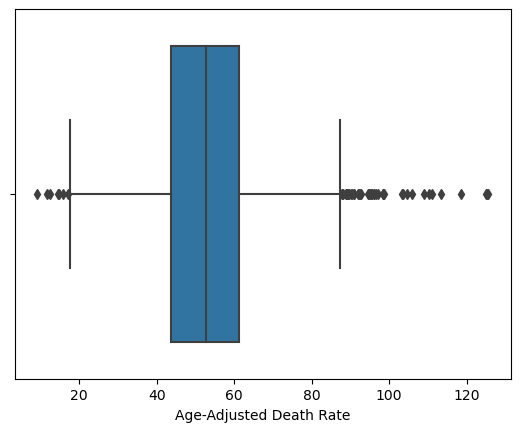

In [32]:
outliers(data_death,'Age-Adjusted Death Rate')

In [33]:
# IQR
Q1 = np.percentile(data_death['Age-Adjusted Death Rate'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_death['Age-Adjusted Death Rate'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

17.5


In [34]:
upper = Q3 +1.5*IQR
print(upper)
lower = Q1 -1.5*IQR
print(lower)

87.45
17.450000000000003


In [35]:
data_death=data_death[(data_death['Age-Adjusted Death Rate']>lower) & (data_death['Age-Adjusted Death Rate']<upper)]

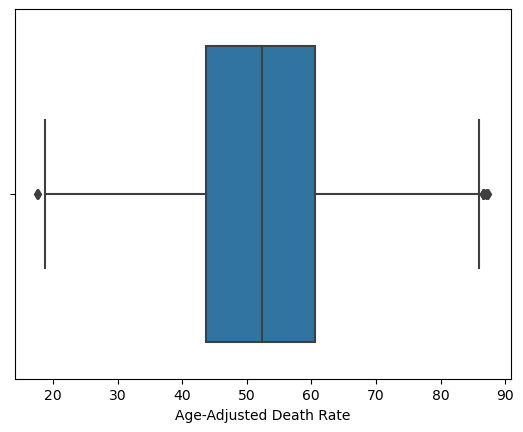

In [36]:
outliers(data_death,'Age-Adjusted Death Rate')

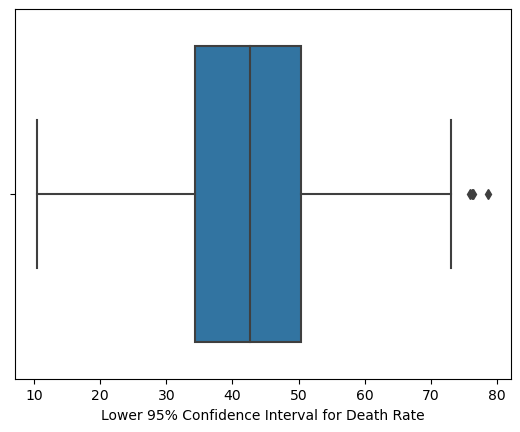

In [37]:
outliers(data_death,'Lower 95% Confidence Interval for Death Rate')

In [38]:
# IQR
Q1 = np.percentile(data_death['Lower 95% Confidence Interval for Death Rate'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_death['Lower 95% Confidence Interval for Death Rate'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

16.049999999999997


In [39]:
upper = Q3 +1.5*IQR
print(upper)
lower = Q1 -1.5*IQR
print(lower)

74.42499999999998
10.225000000000001


In [40]:
data_death=data_death[(data_death['Lower 95% Confidence Interval for Death Rate']>lower) & (data_death['Lower 95% Confidence Interval for Death Rate']<upper)]

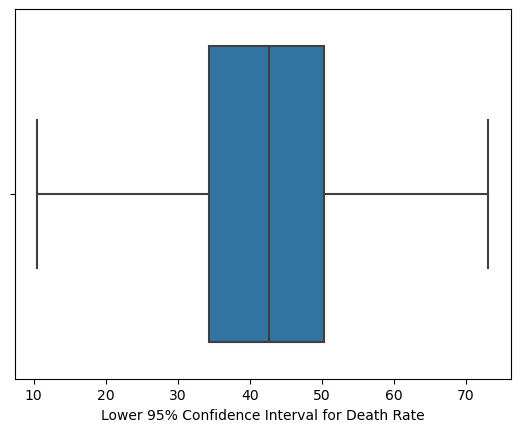

In [41]:
outliers(data_death,'Lower 95% Confidence Interval for Death Rate')

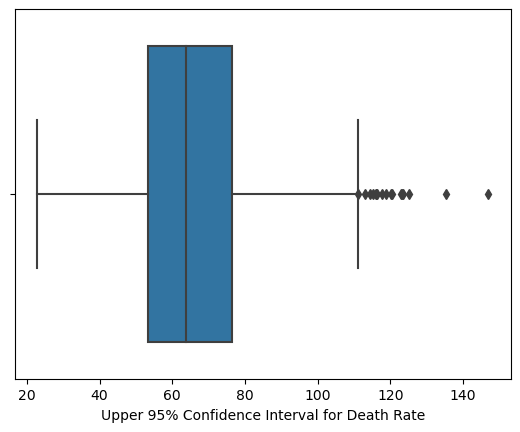

In [42]:
outliers(data_death,'Upper 95% Confidence Interval for Death Rate')

In [43]:
# IQR
Q1 = np.percentile(data_death['Upper 95% Confidence Interval for Death Rate'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_death['Upper 95% Confidence Interval for Death Rate'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

23.14999999999999


In [44]:
upper = Q3 +1.5*IQR
print(upper)
lower = Q1 -1.5*IQR
print(lower)

111.07499999999999
18.475000000000016


In [45]:
data_death=data_death[(data_death['Upper 95% Confidence Interval for Death Rate']>lower) & (data_death['Upper 95% Confidence Interval for Death Rate']<upper)]

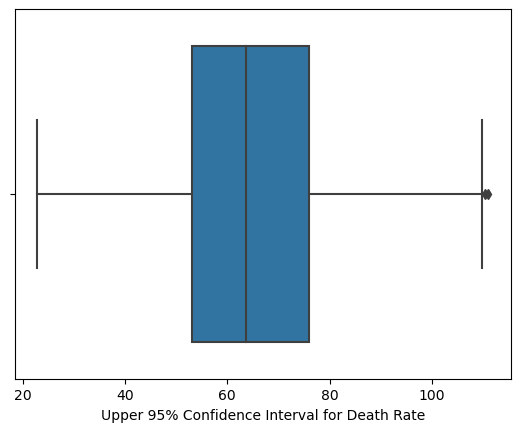

In [46]:
outliers(data_death,'Upper 95% Confidence Interval for Death Rate')

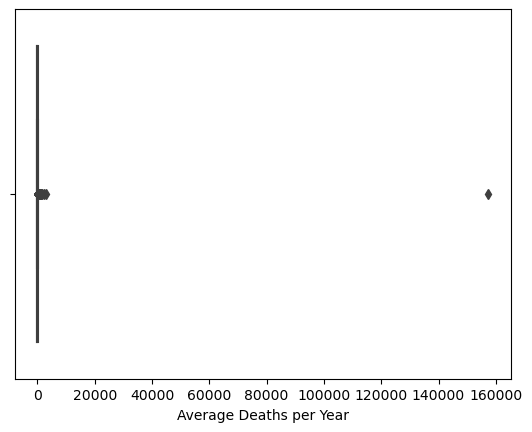

In [47]:
outliers(data_death,'Average Deaths per Year')

In [48]:
# IQR
Q1 = np.percentile(data_death['Average Deaths per Year'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_death['Average Deaths per Year'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

39.0


In [49]:
upper = Q3 +1.5*IQR
print(upper)
lower = Q1 -1.5*IQR
print(lower)

107.5
-48.5


In [50]:
data_death=data_death[(data_death['Average Deaths per Year']>lower) & (data_death['Average Deaths per Year']<upper)]

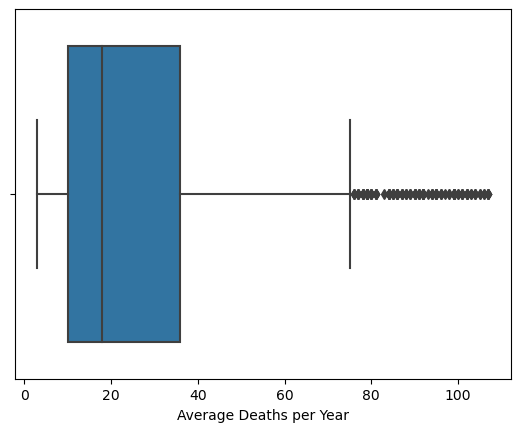

In [51]:
outliers(data_death,'Average Deaths per Year')

The Average deaths per year could change between various county in a huge way and hence the outliers could be treated only to some extent

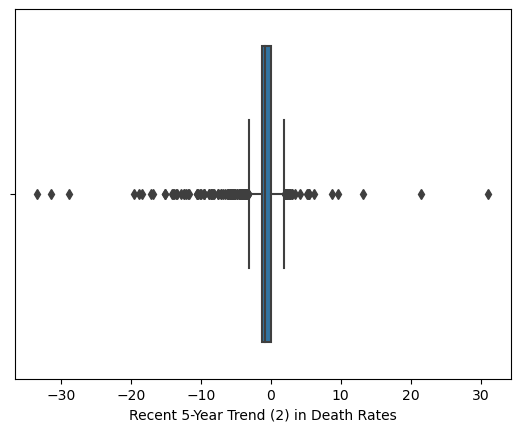

In [52]:
outliers(data_death,'Recent 5-Year Trend (2) in Death Rates')

In [53]:
# IQR
Q1 = np.percentile(data_death['Recent 5-Year Trend (2) in Death Rates'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_death['Recent 5-Year Trend (2) in Death Rates'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

1.3


In [54]:
upper = Q3 +1.5*IQR
print(upper)
lower = Q1 -1.5*IQR
print(lower)

1.9500000000000002
-3.25


In [55]:
data_death=data_death[(data_death['Recent 5-Year Trend (2) in Death Rates']>lower) & (data_death['Recent 5-Year Trend (2) in Death Rates']<upper)]

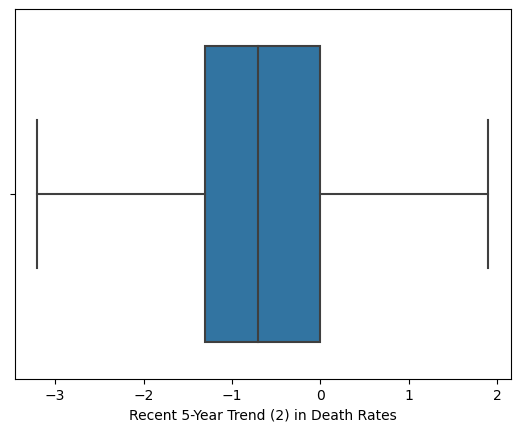

In [56]:
outliers(data_death,'Recent 5-Year Trend (2) in Death Rates')

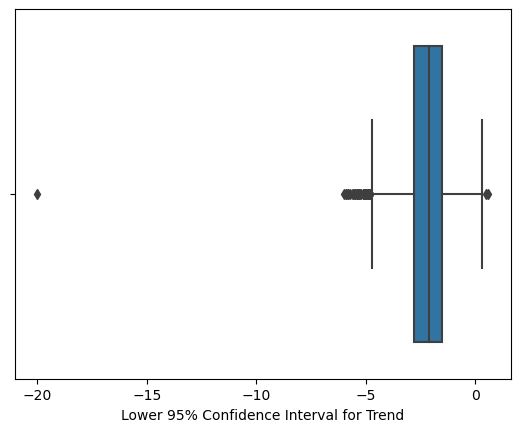

In [57]:
outliers(data_death,'Lower 95% Confidence Interval for Trend')

In [58]:
# IQR
Q1 = np.percentile(data_death['Lower 95% Confidence Interval for Trend'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_death['Lower 95% Confidence Interval for Trend'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

1.2999999999999998


In [59]:
upper = Q3 +1.5*IQR
print(upper)
lower = Q1 -1.5*IQR
print(lower)

0.44999999999999973
-4.75


In [60]:
data_death=data_death[(data_death['Lower 95% Confidence Interval for Trend']>lower) & (data_death['Lower 95% Confidence Interval for Trend']<upper)]

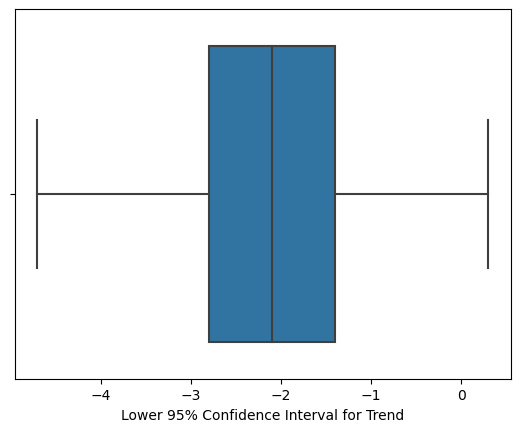

In [61]:
outliers(data_death,'Lower 95% Confidence Interval for Trend')

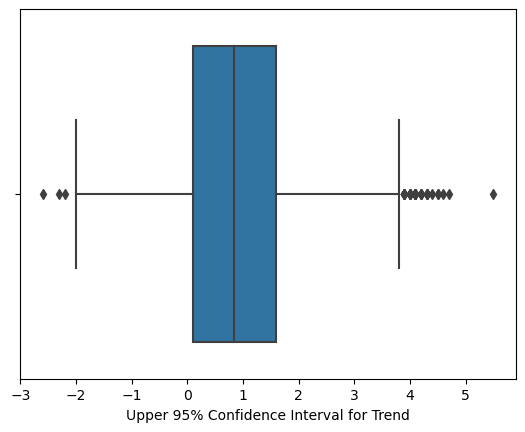

In [62]:
outliers(data_death,'Upper 95% Confidence Interval for Trend')

In [63]:
# IQR
Q1 = np.percentile(data_death['Upper 95% Confidence Interval for Trend'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_death['Upper 95% Confidence Interval for Trend'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

1.5


In [64]:
upper = Q3 +1.5*IQR
print(upper)
lower = Q1 -1.5*IQR
print(lower)

3.85
-2.15


In [65]:
data_death=data_death[(data_death['Upper 95% Confidence Interval for Trend']>lower) & (data_death['Upper 95% Confidence Interval for Trend']<upper)]

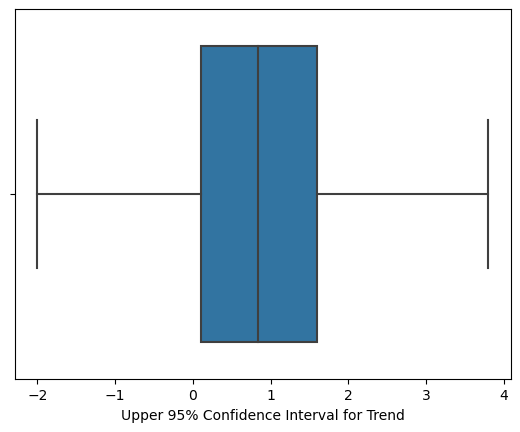

In [66]:
outliers(data_death,'Upper 95% Confidence Interval for Trend')

Data is prepared for EDA and building of model

# Univariate Analysis

(array([0, 1, 2, 3]),
 [Text(0, 0, 'stable'),
  Text(1, 0, 'rising'),
  Text(2, 0, 'falling'),
  Text(3, 0, 'Data too sparse to predict a trend')])

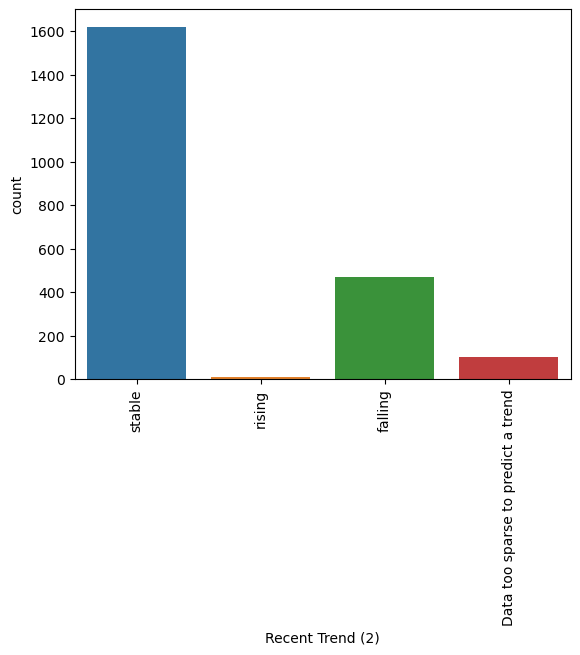

In [67]:
sns.countplot(data_death['Recent Trend (2)'])
plt.xticks(rotation=90)

Most of the County has a stable trend

<AxesSubplot:xlabel='Met Objective of 45.5? (1)', ylabel='count'>

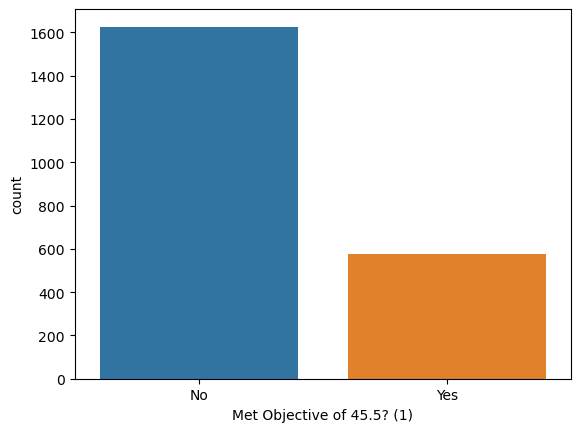

In [68]:
sns.countplot(data_death['Met Objective of 45.5? (1)'])

Most County has not met objective of 45.5

In [69]:
def UVA(data_death,var):
    sns.distplot(data_death[var],kde='True')
    plt.xlabel(var)
    plt.ylabel('Frequency')

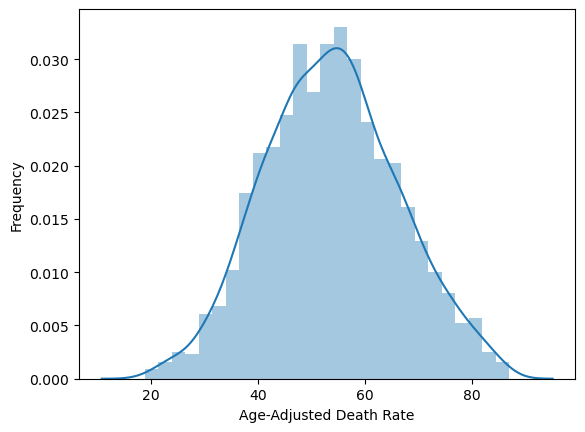

In [70]:
UVA(data_death,'Age-Adjusted Death Rate')

The above feature is normally distributed

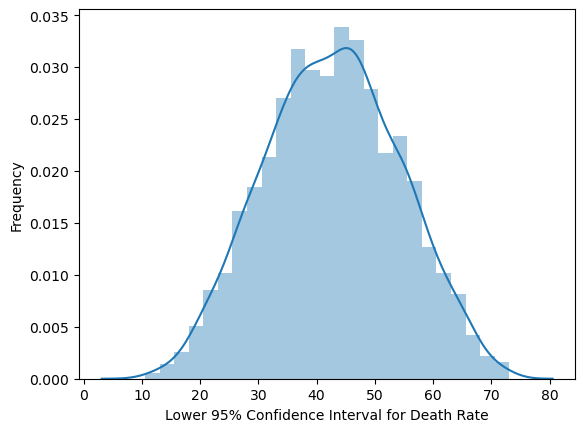

In [71]:
UVA(data_death,'Lower 95% Confidence Interval for Death Rate')

The above feature is normally distributed

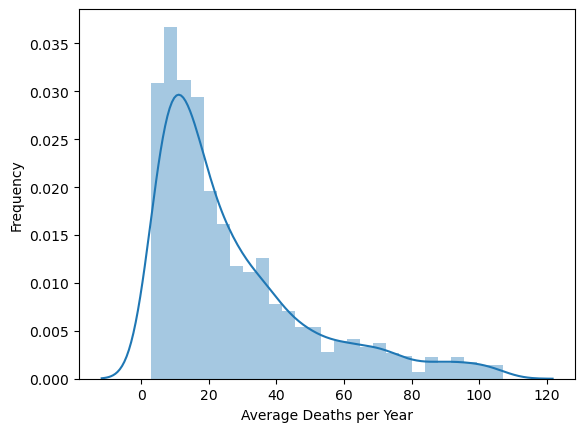

In [72]:
UVA(data_death,'Average Deaths per Year')

The above feature is right skewed

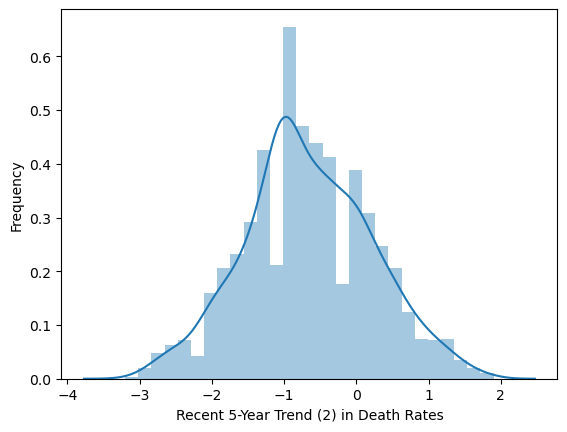

In [73]:
UVA(data_death,'Recent 5-Year Trend (2) in Death Rates')

The above feature is normally distributed

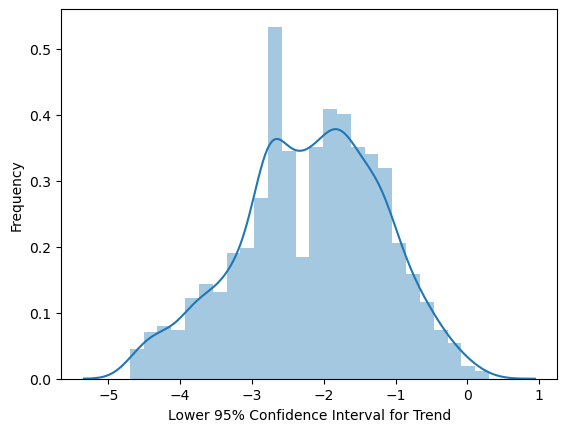

In [74]:
UVA(data_death,'Lower 95% Confidence Interval for Trend')

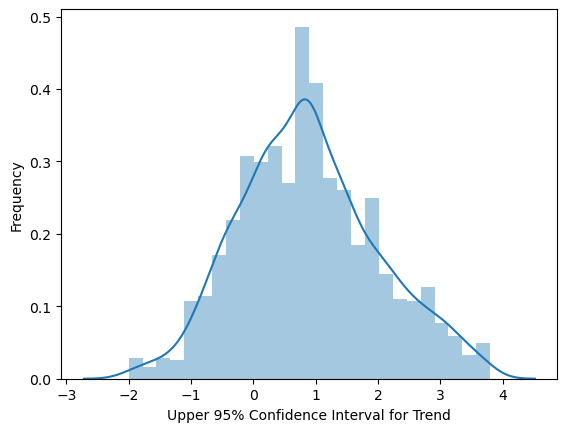

In [75]:
UVA(data_death,'Upper 95% Confidence Interval for Trend')

The above feature is normally distributed

<AxesSubplot:xlabel='count', ylabel='States'>

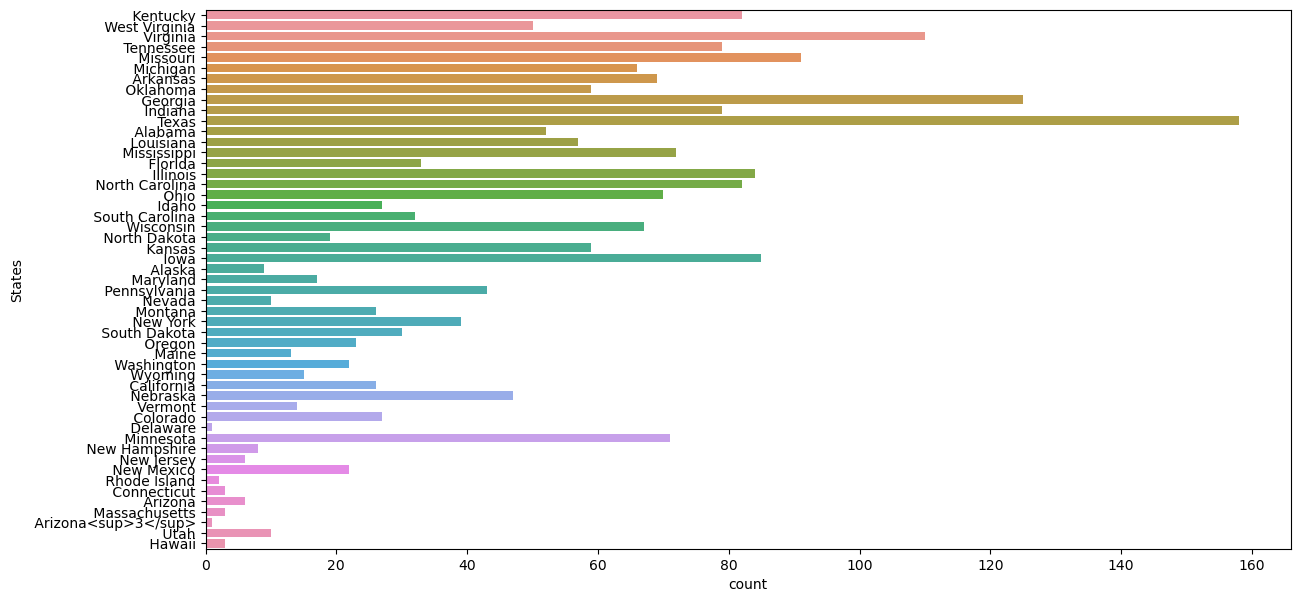

In [76]:
plt.figure(figsize=(14,7))
sns.countplot(y=data_death['States'])

There is more data from the Texas state

# Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='States'>

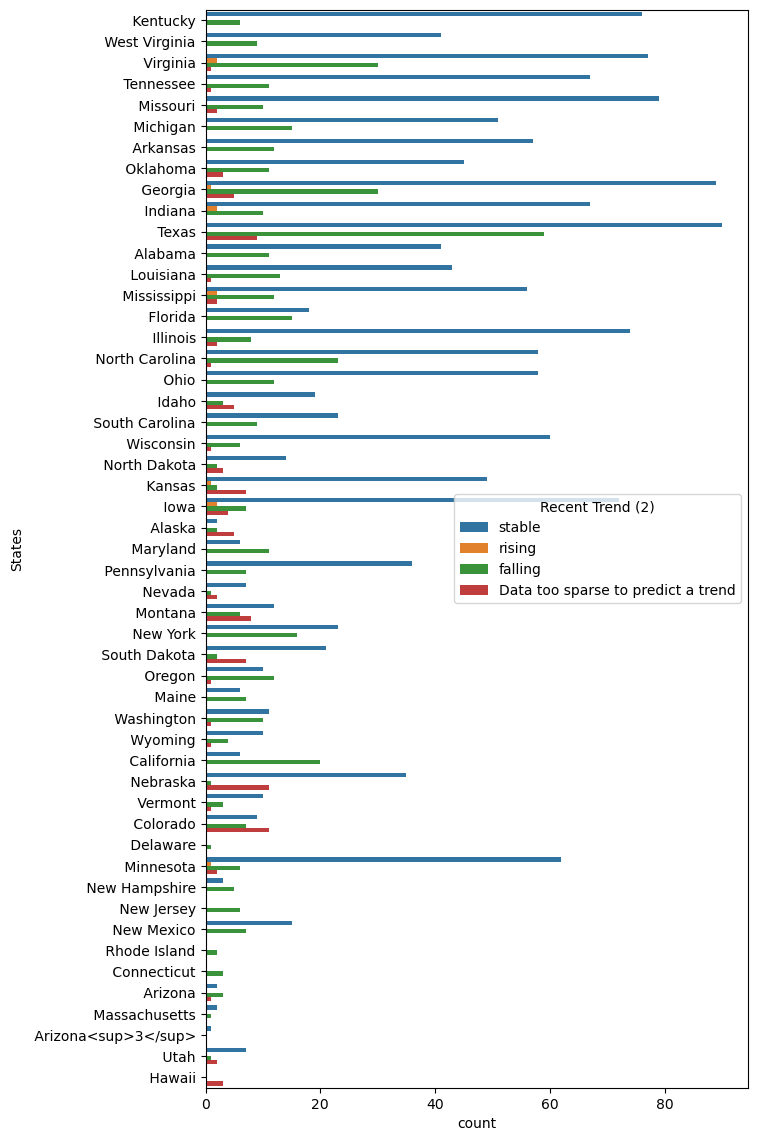

In [77]:
plt.figure(figsize=(7,14))
sns.countplot(data=data_death,hue='Recent Trend (2)',y='States')

The trend is stable for most of the states

(array([0, 1, 2, 3]),
 [Text(0, 0, 'stable'),
  Text(1, 0, 'rising'),
  Text(2, 0, 'falling'),
  Text(3, 0, 'Data too sparse to predict a trend')])

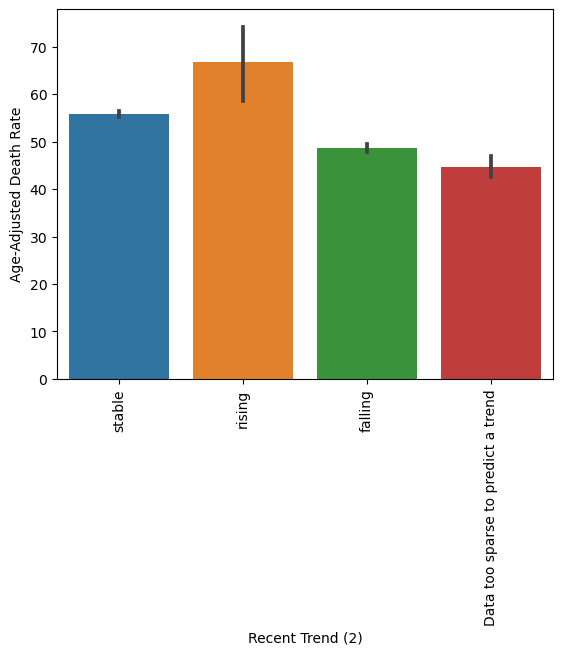

In [78]:
sns.barplot(data=data_death,x='Recent Trend (2)',y='Age-Adjusted Death Rate')
plt.xticks(rotation=90)

With repect to Age Adjusted Death Rates the trend is mostly rising

(array([0, 1, 2, 3]),
 [Text(0, 0, 'stable'),
  Text(1, 0, 'rising'),
  Text(2, 0, 'falling'),
  Text(3, 0, 'Data too sparse to predict a trend')])

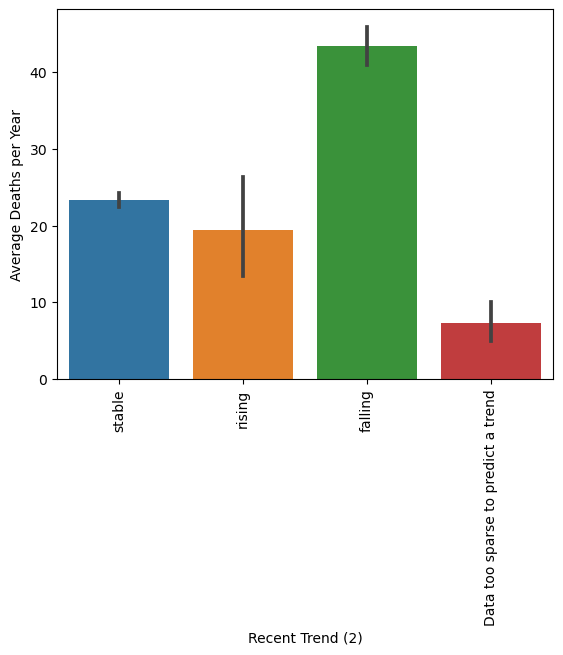

In [79]:
sns.barplot(data=data_death,x='Recent Trend (2)',y='Average Deaths per Year')
plt.xticks(rotation=90)

With repect to Average Deaths per year the trend is mostly falling

(array([0, 1, 2, 3]),
 [Text(0, 0, 'stable'),
  Text(1, 0, 'rising'),
  Text(2, 0, 'falling'),
  Text(3, 0, 'Data too sparse to predict a trend')])

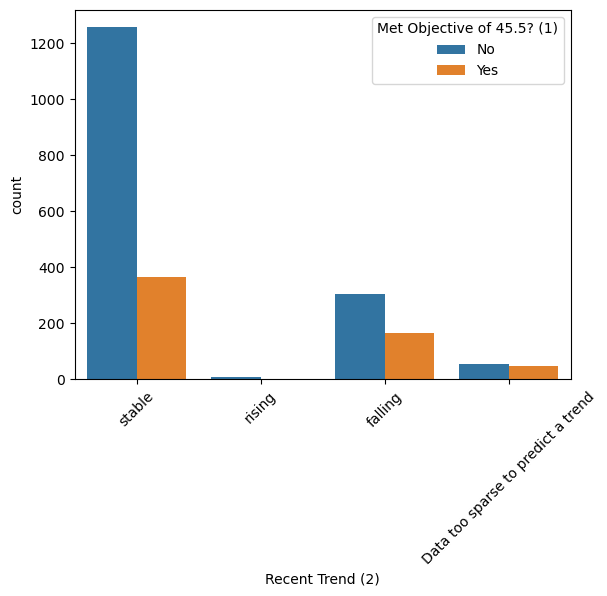

In [80]:
sns.countplot(data=data_death,x='Recent Trend (2)',hue='Met Objective of 45.5? (1)')
plt.xticks(rotation=45)

In all the trends, most of the time objective of 45.5 is not met

<AxesSubplot:xlabel='count', ylabel='States'>

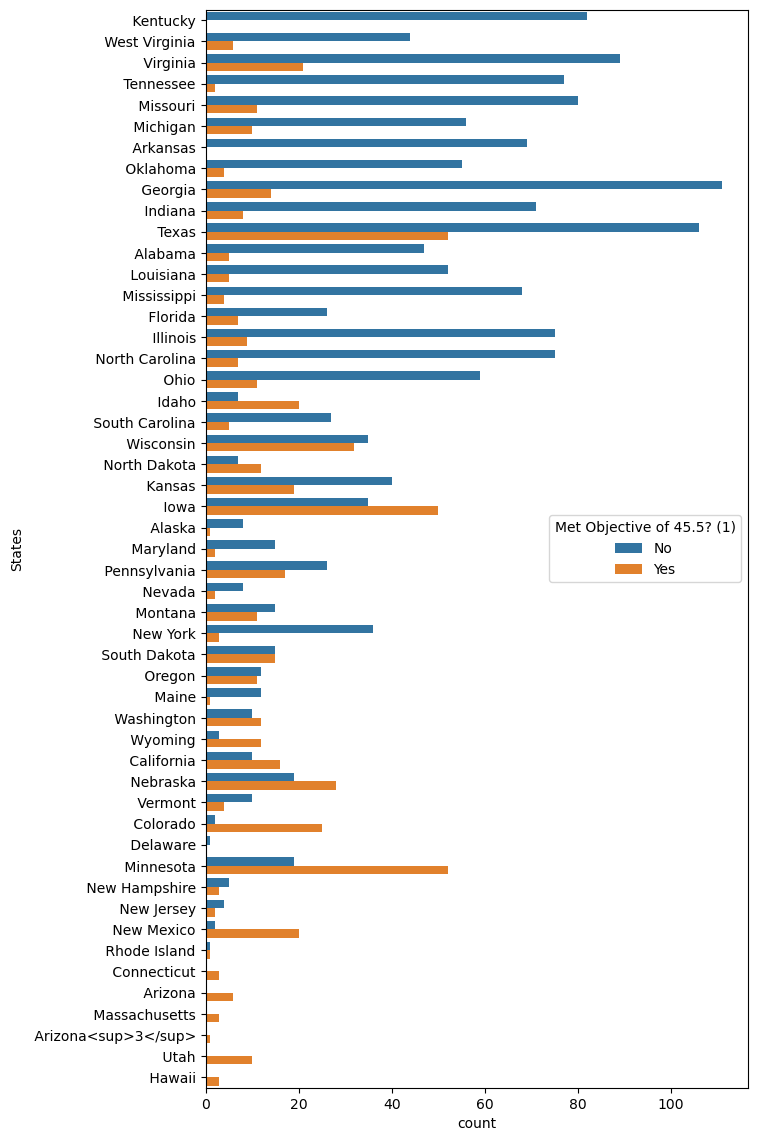

In [81]:
plt.figure(figsize=(7,14))
sns.countplot(data=data_death,y='States',hue='Met Objective of 45.5? (1)')

Objective of 45.5 is not met in most of the states

<AxesSubplot:>

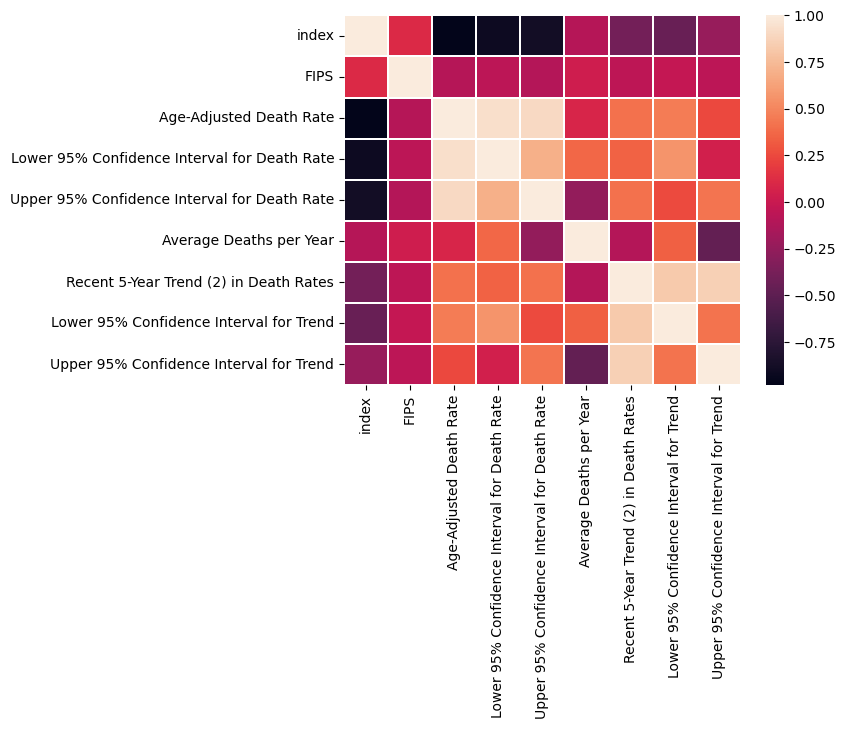

In [82]:
sns.heatmap(data=data_death.corr(),linewidths=0.2)

# Multivariate Analysis

(array([0, 1, 2, 3]),
 [Text(0, 0, 'stable'),
  Text(1, 0, 'rising'),
  Text(2, 0, 'falling'),
  Text(3, 0, 'Data too sparse to predict a trend')])

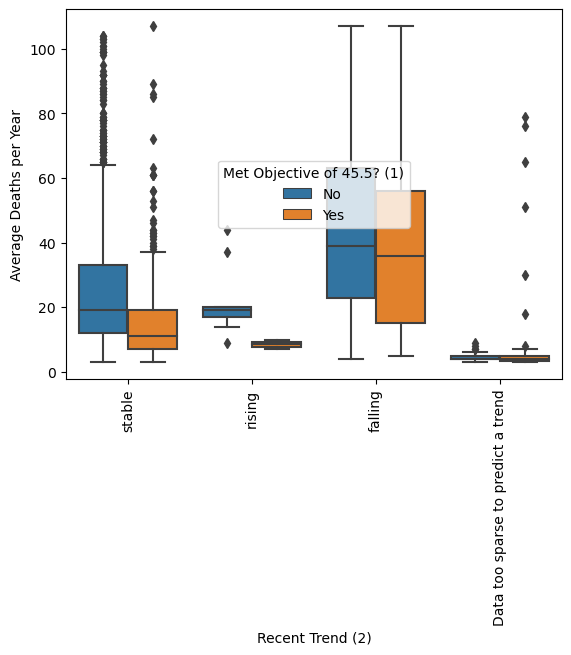

In [83]:
sns.boxplot(data=data_death,y='Average Deaths per Year',x='Recent Trend (2)',hue='Met Objective of 45.5? (1)')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'stable'),
  Text(1, 0, 'rising'),
  Text(2, 0, 'falling'),
  Text(3, 0, 'Data too sparse to predict a trend')])

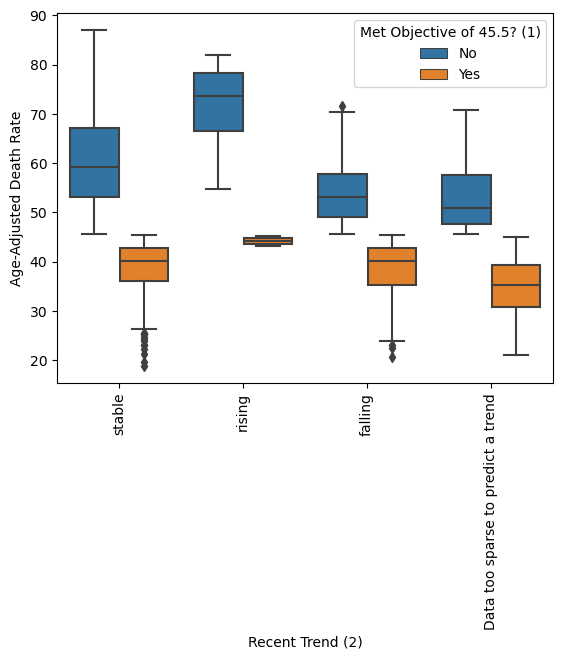

In [84]:
sns.boxplot(data=data_death,y='Age-Adjusted Death Rate',x='Recent Trend (2)',hue='Met Objective of 45.5? (1)')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Age-Adjusted Death Rate', ylabel='Average Deaths per Year'>

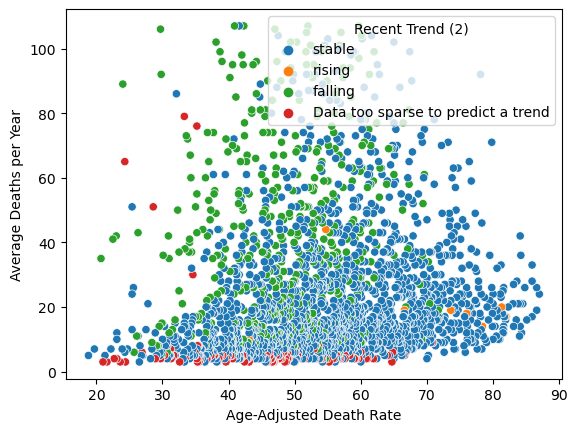

In [85]:
sns.scatterplot(data=data_death,x='Age-Adjusted Death Rate',y='Average Deaths per Year',hue='Recent Trend (2)')

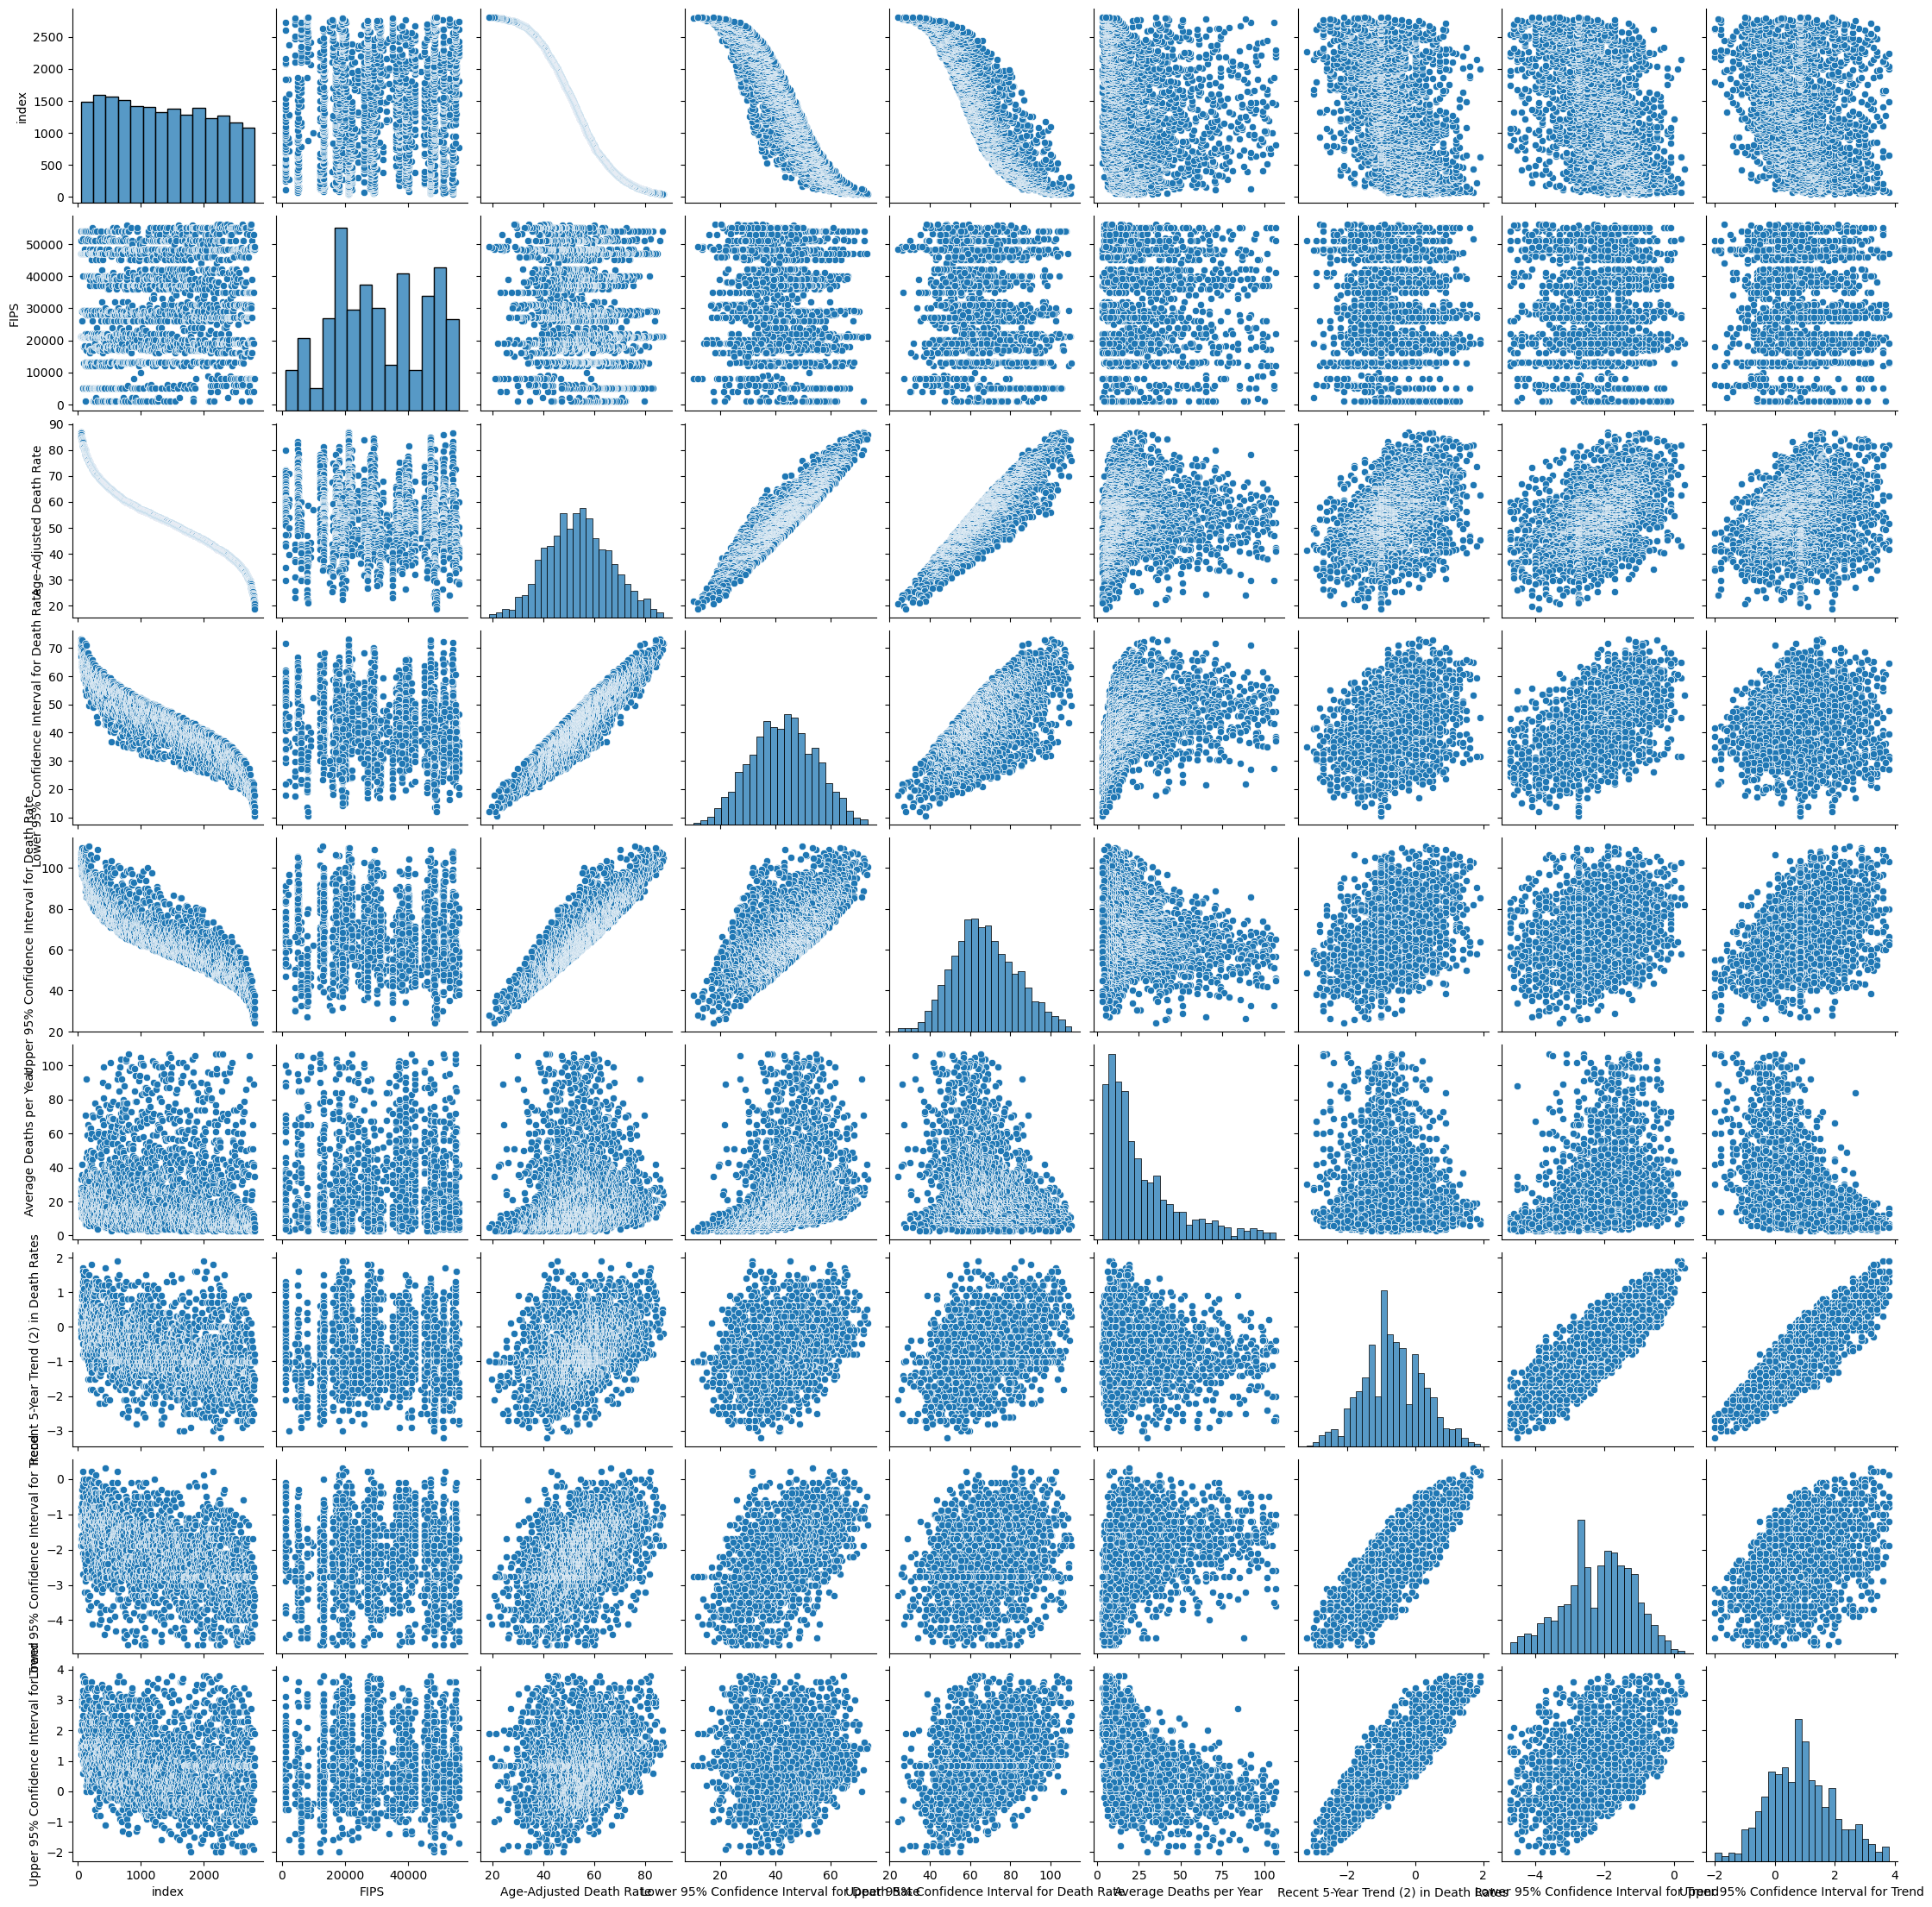

In [86]:
sns.pairplot(data_death)

In [87]:
data_death.describe()

index          FIPS  Age-Adjusted Death Rate  \
count  2204.000000   2204.000000              2204.000000   
mean   1350.151089  30608.474138                53.730036   
std     788.797363  15134.857417                12.530124   
min      45.000000   1001.000000                18.800000   
25%     654.750000  19018.500000                45.100000   
50%    1311.000000  29077.000000                53.600000   
75%    2016.250000  46013.500000                62.100000   
max    2803.000000  56039.000000                87.000000   

       Lower 95% Confidence Interval for Death Rate  \
count                                   2204.000000   
mean                                      42.726044   
std                                       11.551086   
min                                       10.500000   
25%                                       34.500000   
50%                                       42.900000   
75%                                       50.900000   
max                                       73.100000   

       Upper 95% Confidence Interval for Death Rate  Average Deaths per Year  \
count                                   2204.000000              2204.000000   
mean                                      67.550181                26.882486   
std                                       15.840607                22.896167   
min                                       24.100000                 3.000000   
25%                                       56.200000                10.000000   
50%                                       66.300000                19.000000   
75%                                       78.400000                36.000000   
max                                      110.400000               107.000000   

       Recent 5-Year Trend (2) in Death Rates  \
count                             2204.000000   
mean                                -0.663232   
std                                  0.887089   
min                                 -3.200000   
25%                                 -1.200000   
50%                                 -0.700000   
75%                                  0.000000   
max                                  1.900000   

       Lower 95% Confidence Interval for Trend  \
count                              2204.000000   
mean                                 -2.183467   
std                                   0.993703   
min                                  -4.700000   
25%                                  -2.800000   
50%                                  -2.100000   
75%                                  -1.500000   
max                                   0.300000   

       Upper 95% Confidence Interval for Trend  
count                              2204.000000  
mean                                  0.884593  
std                                   1.113229  
min                                  -2.000000  
25%                                   0.100000  
50%                                   0.837305  
75%                                   1.600000  
max                                   3.800000

# Model Building

In [88]:
data_death

index                          County   FIPS Met Objective of 45.5? (1)  \
45       45          Meade County, Kentucky  21163                         No   
47       47          Mason County, Kentucky  21161                         No   
49       49  McDowell County, West Virginia  54047                         No   
50       50          Knott County, Kentucky  21119                         No   
51       51           Knox County, Kentucky  21121                         No   
...     ...                             ...    ...                        ...   
2799   2799             Sevier County, Utah  49041                        Yes   
2800   2800     Rio Grande County, Colorado   8105                        Yes   
2801   2801              Webb County, Texas  48479                        Yes   
2802   2802               Iron County, Utah  49021                        Yes   
2803   2803            Sanpete County, Utah  49039                        Yes   

      Age-Adjusted Death Rate  Lower 95% Confidence Interval for Death Rate  \
45                       87.0                                          71.7   
47                       86.6                                          69.6   
49                       86.6                                          72.0   
50                       85.9                                          67.9   
51                       85.9                                          73.1   
...                       ...                                           ...   
2799                     21.3                                          13.9   
2800                     21.0                                          11.9   
2801                     20.7                                          17.7   
2802                     19.7                                          13.7   
2803                     18.8                                          12.1   

      Upper 95% Confidence Interval for Death Rate  Average Deaths per Year  \
45                                           104.7                       24   
47                                           106.7                       19   
49                                           103.5                       26   
50                                           107.4                       17   
51                                           100.3                       33   
...                                            ...                      ...   
2799                                          31.4                        5   
2800                                          34.9                        3   
2801                                          24.1                       35   
2802                                          27.3                        7   
2803                                          27.9                        5   

                        Recent Trend (2)  \
45                                stable   
47                                stable   
49                                stable   
50                                stable   
51                                stable   
...                                  ...   
2799                              stable   
2800  Data too sparse to predict a trend   
2801                             falling   
2802                              stable   
2803                              stable   

      Recent 5-Year Trend (2) in Death Rates  \
45                                 -0.200000   
47                                  0.500000   
49                                  0.400000   
50                                 -0.300000   
51                                  0.100000   
...                                      ...   
2799                               -0.800000   
2800                               -1.003526   
2801                               -2.100000   
2802                               -1.500000   
2803                               -1.000000   

      Lower 95% Confidence In

In [89]:
x=data_death.drop(columns=['index','Recent Trend (2)','States','County'])

In [90]:
y=data_death['Recent Trend (2)']

In [91]:
x

FIPS Met Objective of 45.5? (1)  Age-Adjusted Death Rate  \
45    21163                         No                     87.0   
47    21161                         No                     86.6   
49    54047                         No                     86.6   
50    21119                         No                     85.9   
51    21121                         No                     85.9   
...     ...                        ...                      ...   
2799  49041                        Yes                     21.3   
2800   8105                        Yes                     21.0   
2801  48479                        Yes                     20.7   
2802  49021                        Yes                     19.7   
2803  49039                        Yes                     18.8   

      Lower 95% Confidence Interval for Death Rate  \
45                                            71.7   
47                                            69.6   
49                                            72.0   
50                                            67.9   
51                                            73.1   
...                                            ...   
2799                                          13.9   
2800                                          11.9   
2801                                          17.7   
2802                                          13.7   
2803                                          12.1   

      Upper 95% Confidence Interval for Death Rate  Average Deaths per Year  \
45                                           104.7                       24   
47                                           106.7                       19   
49                                           103.5                       26   
50                                           107.4                       17   
51                                           100.3                       33   
...                                            ...                      ...   
2799                                          31.4                        5   
2800                                          34.9                        3   
2801                                          24.1                       35   
2802                                          27.3                        7   
2803                                          27.9                        5   

      Recent 5-Year Trend (2) in Death Rates  \
45                                 -0.200000   
47                                  0.500000   
49                                  0.400000   
50                                 -0.300000   
51                                  0.100000   
...                                      ...   
2799                               -0.800000   
2800                               -1.003526   
2801                               -2.100000   
2802                               -1.500000   
2803                               -1.000000   

      Lower 95% Confidence Interval for Trend  \
45                                  -1.900000   
47                                  -1.000000   
49                                  -0.800000   
50                                  -1.900000   
51                                  -1.300000   
...                                       ...   
2799                                -3.400000   
2800                                -2.755939   
2801                                -3.300000   
2802                                -4.100000   
2803                                -3.900000   

      Upper 95% Confidence Interval for Trend  
45                                   1.500000  
47                                   2.000000  
49                                   1.600000  
50                                   1.200000  
51                                   1.500000  
...                                       ...  
2799                                 1.900000  
2800                                 0.837305  
2801  

In [92]:
data=pd.get_dummies(x)
data.head()

FIPS  Age-Adjusted Death Rate  \
45  21163                     87.0   
47  21161                     86.6   
49  54047                     86.6   
50  21119                     85.9   
51  21121                     85.9   

    Lower 95% Confidence Interval for Death Rate  \
45                                          71.7   
47                                          69.6   
49                                          72.0   
50                                          67.9   
51                                          73.1   

    Upper 95% Confidence Interval for Death Rate  Average Deaths per Year  \
45                                         104.7                       24   
47                                         106.7                       19   
49                                         103.5                       26   
50                                         107.4                       17   
51                                         100.3                       33   

    Recent 5-Year Trend (2) in Death Rates  \
45                                    -0.2   
47                                     0.5   
49                                     0.4   
50                                    -0.3   
51                                     0.1   

    Lower 95% Confidence Interval for Trend  \
45                                     -1.9   
47                                     -1.0   
49                                     -0.8   
50                                     -1.9   
51                                     -1.3   

    Upper 95% Confidence Interval for Trend  Met Objective of 45.5? (1)_No  \
45                                      1.5                              1   
47                                      2.0                              1   
49                                      1.6                              1   
50                                      1.2                              1   
51                                      1.5                              1   

    Met Objective of 45.5? (1)_Yes  
45                               0  
47                               0  
49                               0  
50                               0  
51                               0

In [93]:
x=pd.DataFrame(data,columns=data.columns)
x.head()

FIPS  Age-Adjusted Death Rate  \
45  21163                     87.0   
47  21161                     86.6   
49  54047                     86.6   
50  21119                     85.9   
51  21121                     85.9   

    Lower 95% Confidence Interval for Death Rate  \
45                                          71.7   
47                                          69.6   
49                                          72.0   
50                                          67.9   
51                                          73.1   

    Upper 95% Confidence Interval for Death Rate  Average Deaths per Year  \
45                                         104.7                       24   
47                                         106.7                       19   
49                                         103.5                       26   
50                                         107.4                       17   
51                                         100.3                       33   

    Recent 5-Year Trend (2) in Death Rates  \
45                                    -0.2   
47                                     0.5   
49                                     0.4   
50                                    -0.3   
51                                     0.1   

    Lower 95% Confidence Interval for Trend  \
45                                     -1.9   
47                                     -1.0   
49                                     -0.8   
50                                     -1.9   
51                                     -1.3   

    Upper 95% Confidence Interval for Trend  Met Objective of 45.5? (1)_No  \
45                                      1.5                              1   
47                                      2.0                              1   
49                                      1.6                              1   
50                                      1.2                              1   
51                                      1.5                              1   

    Met Objective of 45.5? (1)_Yes  
45                               0  
47                               0  
49                               0  
50                               0  
51                               0

In [94]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
from sklearn.metrics import classification_report

# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
classifier_dt=DecisionTreeClassifier() #creating DecisionTreeClassifier object
classifier_dt.fit(train_x,train_y) #training the model
y_pred=classifier_dt.predict(test_x) #predicting using test dataset

In [101]:
print("Train Score:",classifier_dt.score(train_x,train_y))
print("Test Score:",classifier_dt.score(test_x,test_y))

Train Score: 1.0
Test Score: 0.9764065335753176


In [102]:
print(confusion_matrix(test_y,y_pred))

[[ 20   0   0   0]
 [  0 119   0   4]
 [  0   0   0   1]
 [  2   6   0 399]]


In [103]:
print(accuracy_score(test_y,y_pred))

0.9764065335753176


In [104]:
print(classification_report(test_y,y_pred))

                                    precision    recall  f1-score   support

Data too sparse to predict a trend       0.91      1.00      0.95        20
                           falling       0.95      0.97      0.96       123
                            rising       0.00      0.00      0.00         1
                            stable       0.99      0.98      0.98       407

                          accuracy                           0.98       551
                         macro avg       0.71      0.74      0.72       551
                      weighted avg       0.98      0.98      0.98       551



# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(train_x, train_y)
y_pred= classifier_rf.predict(test_x)

In [107]:
print("Train Score:",classifier_rf.score(train_x,train_y))
print("Test Score:",classifier_rf.score(test_x,test_y))

Train Score: 0.999395039322444
Test Score: 0.9818511796733213


In [108]:
print(confusion_matrix(test_y,y_pred))

[[ 20   0   0   0]
 [  0 122   0   1]
 [  0   0   0   1]
 [  0   8   0 399]]


In [109]:
print(accuracy_score(test_y,y_pred))

0.9818511796733213


In [110]:
print(classification_report(test_y,y_pred))

                                    precision    recall  f1-score   support

Data too sparse to predict a trend       1.00      1.00      1.00        20
                           falling       0.94      0.99      0.96       123
                            rising       0.00      0.00      0.00         1
                            stable       1.00      0.98      0.99       407

                          accuracy                           0.98       551
                         macro avg       0.73      0.74      0.74       551
                      weighted avg       0.98      0.98      0.98       551



# KNN Model

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
classifier_knn.fit(train_x,train_y)
y_pred=classifier_knn.predict(test_x)

In [113]:
print("Train Score:",classifier_knn.score(train_x,train_y))
print("Test Score:",classifier_knn.score(test_x,test_y))

Train Score: 0.8106473079249849
Test Score: 0.7604355716878403


In [115]:
print(confusion_matrix(test_y,y_pred))

[[  5   2   0  13]
 [  0  42   0  81]
 [  0   0   0   1]
 [  8  27   0 372]]


In [116]:
print(accuracy_score(test_y,y_pred))

0.7604355716878403


In [114]:
print(classification_report(test_y,y_pred))

                                    precision    recall  f1-score   support

Data too sparse to predict a trend       0.38      0.25      0.30        20
                           falling       0.59      0.34      0.43       123
                            rising       0.00      0.00      0.00         1
                            stable       0.80      0.91      0.85       407

                          accuracy                           0.76       551
                         macro avg       0.44      0.38      0.40       551
                      weighted avg       0.73      0.76      0.74       551



# Naive Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB   

In [118]:
classifier_GB = GaussianNB()  
classifier_GB.fit(train_x, train_y)
y_pred=classifier_GB.predict(test_x) 

In [119]:
print("Train Score:",classifier_GB.score(train_x,train_y))
print("Test Score:",classifier_GB.score(test_x,test_y))

Train Score: 0.8281911675741077
Test Score: 0.8148820326678766


In [120]:
print(confusion_matrix(test_y,y_pred))

[[ 19   0   0   1]
 [  0 107   0  16]
 [  0   0   0   1]
 [ 40  35   9 323]]


In [121]:
print(accuracy_score(test_y,y_pred))

0.8148820326678766


In [122]:
print(classification_report(test_y,y_pred))

                                    precision    recall  f1-score   support

Data too sparse to predict a trend       0.32      0.95      0.48        20
                           falling       0.75      0.87      0.81       123
                            rising       0.00      0.00      0.00         1
                            stable       0.95      0.79      0.86       407

                          accuracy                           0.81       551
                         macro avg       0.51      0.65      0.54       551
                      weighted avg       0.88      0.81      0.84       551



# SVC

In [123]:
from sklearn.svm import SVC

In [124]:
classifier_SVC = SVC(kernel='linear', random_state=0)  
classifier_SVC.fit(train_x, train_y)
y_pred=classifier_SVC.predict(test_x)

In [125]:
print("Train Score:",classifier_SVC.score(train_x,train_y))
print("Test Score:",classifier_SVC.score(test_x,test_y))

Train Score: 0.8481548699334543
Test Score: 0.852994555353902


In [126]:
print(confusion_matrix(test_y,y_pred))

[[  6   0   0  14]
 [  1  79   0  43]
 [  0   0   0   1]
 [  6  14   2 385]]


In [127]:
print(accuracy_score(test_y,y_pred))

0.852994555353902


In [128]:
print(classification_report(test_y,y_pred))

                                    precision    recall  f1-score   support

Data too sparse to predict a trend       0.46      0.30      0.36        20
                           falling       0.85      0.64      0.73       123
                            rising       0.00      0.00      0.00         1
                            stable       0.87      0.95      0.91       407

                          accuracy                           0.85       551
                         macro avg       0.55      0.47      0.50       551
                      weighted avg       0.85      0.85      0.85       551



# Cross Validation

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
print('Random Forest:')
cross_val_score(RandomForestClassifier(),x,y)

Random Forest:


array([0.97278912, 0.98185941, 0.97959184, 0.97505669, 0.94090909])

In [131]:
print('Decision Tree:')
cross_val_score(DecisionTreeClassifier(),x,y)

Decision Tree:


array([0.97052154, 0.97505669, 0.97505669, 0.97278912, 0.59318182])

In [132]:
print('KNN:')
cross_val_score(KNeighborsClassifier(),x,y)

KNN:


array([0.75736961, 0.72562358, 0.71428571, 0.70068027, 0.7       ])

In [133]:
print('Naive Bayes:')
cross_val_score(GaussianNB(),x,y)

Naive Bayes:


array([0.66439909, 0.93650794, 0.95011338, 0.7324263 , 0.43863636])

In [134]:
print('SVC:')
cross_val_score(SVC(),x,y)

SVC:


array([0.73469388, 0.73469388, 0.73469388, 0.73469388, 0.73636364])

# Hyperparameter tuning

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
#Decision Tree
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(train_x, train_y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [137]:
score_dt=grid_search_cv.best_score_
param_dt=grid_search_cv.best_params_
print('Best Score of Decision Tree:',score_dt)
print('Best Parameters of Decision Tree:',param_dt)

Best Score of Decision Tree: 0.9812462189957653
Best Parameters of Decision Tree: {'max_leaf_nodes': 19, 'min_samples_split': 4}


In [138]:
#Random Forest
clf=GridSearchCV(RandomForestClassifier(),{'n_estimators':[1,5,10]},cv=5,return_train_score=False)
clf.fit(x,y)
score_rf=clf.best_score_
param_rf=clf.best_params_
print('Best Score of Random Forest:',score_rf)
print('Best parameters of Random Forest:',param_rf)

Best Score of Random Forest: 0.9346052360338074
Best parameters of Random Forest: {'n_estimators': 10}


In [139]:
#KNN
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
# defining parameter range
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(train_x,train_y)
score_knn=grid_search.best_score_
param_knn=grid_search.best_params_
print('Best Score of KNN:',score_knn)
print('Best parameters of KNN:',param_knn)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Score of KNN: 0.7513581599123768
Best parameters of KNN: {'n_neighbors': 12}


In [140]:
#NaiveBayes
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(GaussianNB(), param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(x)
gs_NB.fit(Data_transformed, y)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [141]:
score_NB=gs_NB.best_score_
param_NB=gs_NB.best_params_
print('Best Score of Naive Bayes:',score_NB)
print('Best parameters of Naive Bayes:',param_NB)

Best Score of Naive Bayes: 0.9218054696626126
Best parameters of Naive Bayes: {'var_smoothing': 0.0001232846739442066}


In [142]:
Scores_comparison={
    'Models':['Decision Tree','Random Forest','KNN','Naive Bayes'],
    'Scores before hyperparameter tuning':[classifier_dt.score(test_x,test_y),classifier_rf.score(test_x,test_y),classifier_knn.score(test_x,test_y),classifier_GB.score(test_x,test_y)],
    'Scores after hyperparameter tuning':[score_dt,score_rf,score_knn,score_NB]
}

In [143]:
Scores_comparison=pd.DataFrame(Scores_comparison)

In [144]:
Scores_comparison

Models  Scores before hyperparameter tuning  \
0  Decision Tree                             0.976407   
1  Random Forest                             0.981851   
2            KNN                             0.760436   
3    Naive Bayes                             0.814882   

   Scores after hyperparameter tuning  
0                            0.981246  
1                            0.934605  
2                            0.751358  
3                            0.921805

In [145]:
Models_comparison={
    'Models':['Decision Tree','Random Forest','KNN','Naive Bayes'],
    'Scores':[score_dt,score_rf,score_knn,score_NB],
    'Parameters':[param_dt,param_rf,param_knn,param_NB]
}

In [146]:
Models_comparison=pd.DataFrame(Models_comparison)

In [147]:
Models_comparison

Models    Scores                                      Parameters
0  Decision Tree  0.981246  {'max_leaf_nodes': 19, 'min_samples_split': 4}
1  Random Forest  0.934605                            {'n_estimators': 10}
2            KNN  0.751358                             {'n_neighbors': 12}
3    Naive Bayes  0.921805        {'var_smoothing': 0.0001232846739442066}

For SVC, tuning the hyperparameters in this dataset turned out to be very time complex. Both GridSearchCV and RandomizedSearchCV was tried but they both took hours to run and hence tuning of hyperparameters for SVC has been skipped.

However from the train, test and cross validation scores of SVC it could be concluded that SVC is not more accurate than the Decision Tree model

Decision Tree is the best model

# Deploy Model

In [148]:
import pickle
with open('cancer_death_decisiontree.pkl','wb') as file:
     pickle.dump(classifier_dt,file)